# Reading the web page into Python

In [10]:
# importing required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [11]:
#target url to scrape
url = 'https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html'

In [12]:
r = requests.get(url) 

The code above fetches our web page from the URL, and stores the result in a "response" object called ```r```. That response object has a ```text``` attribute, which contains the same HTML code we get when viewing the page source from chrome web browser.

In [13]:
# print the first 500 characters of the HTML
print(r.text[:500])  

<!DOCTYPE html>
<!--[if (gt IE 9)|!(IE)]> <!--><html lang="en" class="no-js page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html" itemtype="http://schema.org/NewsArticle" itemscope xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-opinion page


# Parsing the html using Beautiful Soup

In [14]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text,'html.parser')

The code above parses the HTML (stored in r.text) into a special object called soup that the Beautiful Soup library understands. In other words, ***Beautiful Soup is reading the HTML and making sense of its structure.***

(Note that html parser is the parser included with the Python standard library, though other parsers can be used by Beautiful Soup.)

### Collecting all of the records

Taking advantage of the patterns we noticed in the article formatting to build our dataset. Each record will be tagged in a consistent way in the HTML. This is the pattern that allows us to build our dataset.

The Beautiful Soup methods required for this task are:

1. find()
2. find_all()

There is an excellent tutorial on these methods [Searching the tree](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree) in the Beautiful Soup documentation.

## Determining Pattern

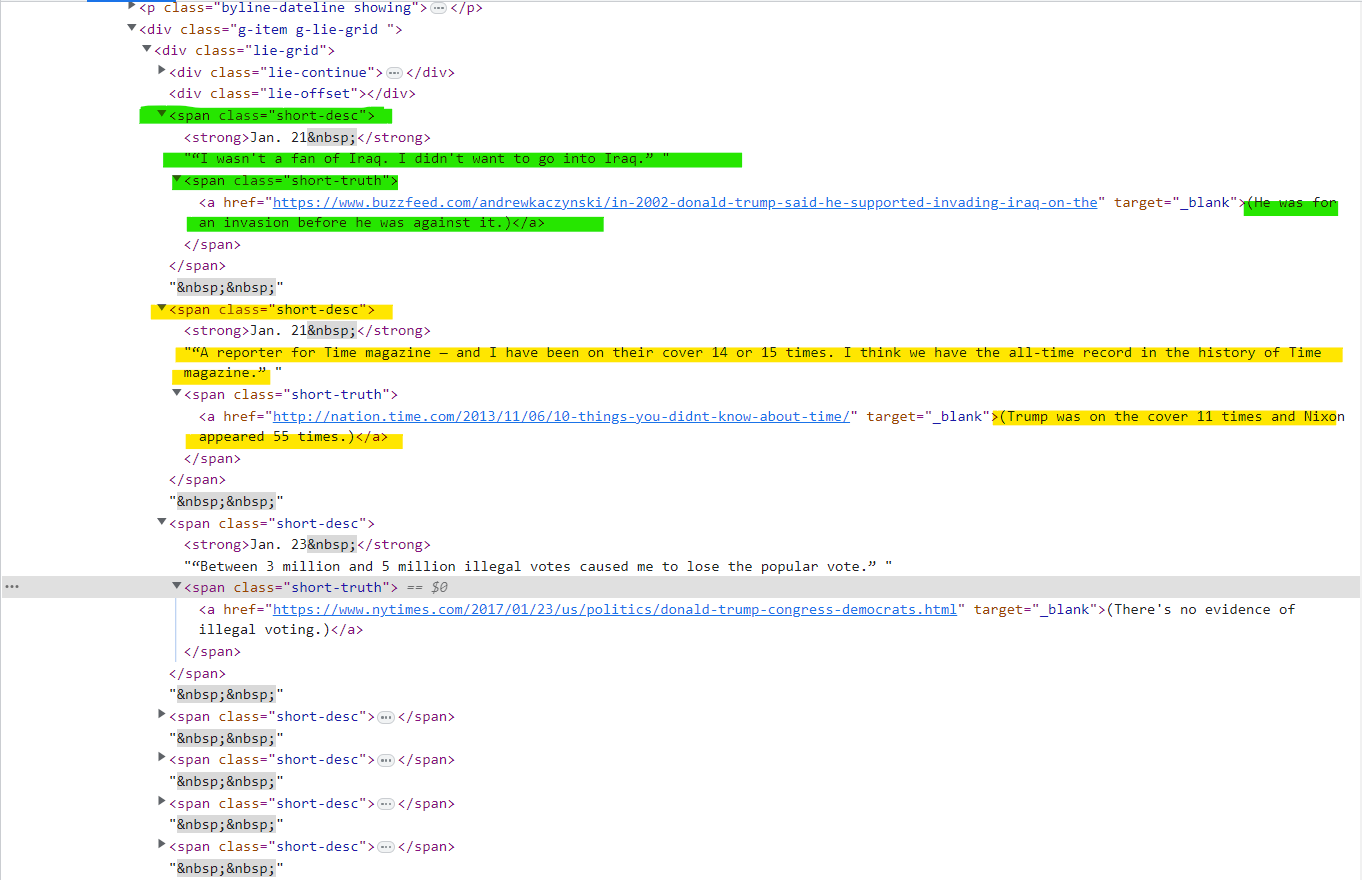

## Sample code on how to extract

In [15]:
results = soup.find_all('span',attrs={'class':'short-desc'})


`results = soup.find_all('span',attrs={'class':'short-desc'})`
Here the `results` is a special object of type `list` provided by beautiful soup library to extract each pattern in the webpage.

In [16]:
len(results)

180

## Sample output of above text

***This is one of the elements of the `results` object.***

`<span class="short-desc"><strong>July 19 </strong>“But the F.B.I. person really reports directly to the president of the United States, which is interesting.” <span class="short-truth"><a href="https://www.usatoday.com/story/news/politics/onpolitics/2017/07/20/fbi-director-reports-justice-department-not-president/495094001/" target="_blank">(He reports directly to the attorney general.)</a></span></span>`



## Extracting Date

In [8]:
first_result = results[0]
first_result.find('strong')
first_result.find('strong').text[0:-1]+' 2017'
#this text[0:-1] is because an escape sequence might occur to remove it we do so.

'Jan. 21 2017'

## Extract the lie

In [9]:
first_result

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [10]:
first_result.contents

[<strong>Jan. 21 </strong>,
 "“I wasn't a fan of Iraq. I didn't want to go into Iraq.” ",
 <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span>]

This is a list that contains all the text and tags inside the 'first_result' object.contents() is used because no tags are surrounding the text on both sides.

In [11]:
first_result.contents[1]

"“I wasn't a fan of Iraq. I didn't want to go into Iraq.” "

In [12]:
first_result.contents[1][1:-2]

"I wasn't a fan of Iraq. I didn't want to go into Iraq."

## Extract the explanation

In [13]:
first_result.contents[2]

<span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span>

In [14]:
first_result.find('a')
#searching for surrounding tags

<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a>

In [16]:
first_result.find('a').text[1:-1]

'He was for an invasion before he was against it.'

## Extract the result

In [17]:
first_result.find('a')['href']

'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'

Each of the attributes in a tag is key of a dictionary.Using the key 'href' extract the value which is link.

## Recap: Beautiful Soup methods and attributes


Before we finish building the dataset, I want to summarize a few ways you can interact with Beautiful Soup objects.

You can apply these two methods to either the initial soup object or a Tag object (such as first_result):

find(): searches for the first matching tag, and returns a Tag object

find_all(): searches for all matching tags, and returns a ResultSet object (which you can treat like a list of Tags)


You can extract information from a Tag object (such as first_result) using these two attributes:

text: extracts the text of a Tag, and returns a string


contents: extracts the children of a Tag, and returns a list of Tags and strings


It's important to keep track of whether you are interacting with a Tag, ResultSet, list, or string, because that affects which methods and attributes you can access.

And of course, there are many more methods and attributes available to you, which are described in the Beautiful Soup documentation.



## Building the dataset

In [19]:
records = []
for result in results:
    date = result.find('strong').text[0:-1] + ', 2017'
    lie = result.contents[1][1:-2]
    explanation = result.find('a').text[1:-1]
    url = result.find('a')['href']
    records.append((date, lie, explanation, url))

## Exporting a csv with pandas

In [23]:
import pandas as pd
df = pd.DataFrame(records,columns=['date','lie','explanation','url'])
df['date']=pd.to_datetime(df['date'])
df.to_csv('trump_lies.csv',index=False,encoding='utf-8')

In [24]:
df

date                                                lie  \
0   2017-01-21  I wasn't a fan of Iraq. I didn't want to go in...   
1   2017-01-21  A reporter for Time magazine — and I have been...   
2   2017-01-23  Between 3 million and 5 million illegal votes ...   
3   2017-01-25  Now, the audience was the biggest ever. But th...   
4   2017-01-25  Take a look at the Pew reports (which show vot...   
..         ...                                                ...   
175 2017-10-25      We have trade deficits with almost everybody.   
176 2017-10-27  Wacky & totally unhinged Tom Steyer, who has b...   
177 2017-11-01  Again, we're the highest-taxed nation, just ab...   
178 2017-11-07  When you look at the city with the strongest g...   
179 2017-11-11  I'd rather have him  – you know, work with him...   

                                           explanation  \
0     He was for an invasion before he was against it.   
1    Trump was on the cover 11 times and Nixon appe...   
2               There's no evidence of illegal voting.   
3    Official aerial photos show Obama's 2009 inaug...   
4              The report never mentioned voter fraud.   
..                                                 ...   
175  We have trade surpluses with more than 100 cou...   
176  Steyer has financially supported many winning ...   
177                                         We're not.   
178  Several other cities, including New York and L...   
179  There is no evidence that Democrats "set up" R...   

                                                   url  
0    https://www.buzzfeed.com/andrewkaczynski/in-20...  
1    http://nation.time.com/2013/11/06/10-things-yo...  
2    https://www.nytimes.com/2017/01/23/us/politics...  
3    https://www.nytimes.com/2017/01/21/us/politics...  
4    https://www.nytimes.com/2017/01/24/us/politics...  
..                                                 ...  
175  https://www.bea.gov/newsreleases/international...  
176  https://www.opensecrets.org/donor-lookup/resul...  
177  http://www.politifact.com/truth-o-meter/statem...  
178  http://www.politifact.com/truth-o-meter/statem...  
179  https://www.nytimes.com/interactive/2017/12/10...  

[180 rows x 4 columns]

# FINAL CODE

In [ ]:
import requests  
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

from bs4 import BeautifulSoup  
soup = BeautifulSoup(r.text, 'html.parser')  
results = soup.find_all('span', attrs={'class':'short-desc'})

records = []  
for result in results:  
    date = result.find('strong').text[0:-1] + ', 2017'
    lie = result.contents[1][1:-2]
    explanation = result.find('a').text[1:-1]
    url = result.find('a')['href']
    records.append((date, lie, explanation, url))

import pandas as pd  
df = pd.DataFrame(records, columns=['date', 'lie', 'explanation', 'url'])  
df['date'] = pd.to_datetime(df['date'])  
df.to_csv('trump_lies.csv', index=False, encoding='utf-8') 


[Complete Guide](https://www.dataschool.io/python-web-scraping-of-president-trumps-lies/)